# Procesamiento Digital de Señales <img src="./logo_UTN.svg" align="right" width="150"/>
## Alumno: Emanuel Olay
### Tarea Semanal: 7
### Consigna:
En esta tarea continuaremos con el capítulo 14 de Holton. DSP Principles and App.

Para ello, realizaremos el punto 3.a del TP2.

3- Genere la siguiente señal

$$x_{(k)}=a_0*sen(Ω1*k)$$

siendo

$$a_0=2$$
$$Ω1=Ω0+fr⋅2πN$$
$$Ω0=π2$$
y la variable aleatoria definida por la siguiente distribución de probabilidad

$fr∼U(−2,2)$


Considere 200 realizaciones (muestras tomadas de fr) para cada ventana analizada en la TS6. Se pide entonces:

3.a) Grafique los histogramas de
$|Xiw(Ω0)|$


siendo

$|X^i_w(Ω)|=|F\{x(k)*w_i(k)\}|$
para la i-ésima ventana de las 5 utilizadas en la TS6. El sesgo y la varianza se definen para este caso como:

 Grafique los 5 histogramas juntos, o cuide que todos los gráficos tengan el mismo rango de valores en X para facilitar la comparación visual.
3.b) Calcule experimentalmente el sesgo y la varianza del siguiente estimador:
$$\hat a_0=|X^i_w(Ω0)|$$
siendo

$sa=E{\hat a_0}−a0$

$va=var\{\hat a0\}=E\{(\hat a0 −E\{\hat a0\})^2\}$
y pueden aproximarse cuando consideramos los valores esperados como las medias muestrales

$E{a0^}=μa^=1M∑j=0M−1aj^$

$sa=μa^−a0$

$va=1/M∑j=0M−1(aj^−μa^)^2$


Estimación de Amplitud 
 
 
sa	va
Rectangular	 	 
Bartlett	 	 
Hann	 	 
Blackman	 	 
Flat-top	 	 
Bonus
Visualizar los 5 histogramas juntos

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Wed Oct 13 20:52:38 2021

@author: Ema
"""
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
from scipy.fft import fft, fftshift
import matplotlib.patches as mpatches
from pandas import DataFrame
from IPython.display import HTML

In [3]:
#######################################################################################################################
#%% Inicio de la simulación
#######################################################################################################################
plt.close('all')

# Datos generales de la simulación
fs = 1000 # frecuencia de muestreo (Hz)
N = 1000   # cantidad de muestras

figura=0
 
ts = 1/fs # tiempo de muestreo
df = fs/N # resolución espectral

t=np.arange(0,1,ts)
f=np.arange(0,fs,df)
####################
###Armo la se;al
####################
a0=2
omega_0=np.pi/2
fr=np.random.uniform(low=-2, high=2, size=200)
omega_1=omega_0+fr*2*np.pi/N
## como uno es de (200,1) y el otro es de (1000,1) no puedo hacer el producto
##cambio los ejes para que sea (200,1)*(1,1000)

x=np.sin(2*np.pi*omega_1.reshape(1,200)*(fs/(2*np.pi))*t.reshape(1000,1))
#plt.plot(t,x)

In [4]:
#######################
#Ventaneo
#######################
Rectangular=sig.windows.boxcar(N)
##python al ver los primeros indices iguales extiende la segunda
x_rectangular=x*Rectangular.reshape(1000,1)
#plt.plot(t,x_rectangular)
x_rectangular_fft=fft(x_rectangular,axis=0)*(1/N)
#Bartlett
Bartlett=np.bartlett(N)
##python al ver los primeros indices iguales extiende la segunda
x_Bartlett=x*Bartlett.reshape(1000,1)
#plt.plot(t,x_Bartlett)
x_Bartlett_fft=fft(x_Bartlett,axis=0)*(1/N)
#Hann
Hann=np.hanning(N)
x_Hann=x*Hann.reshape(1000,1)
#plt.plot(t,x_Hann)
x_Hann_fft=fft(x_Hann,axis=0)*(1/N)
#Blackman
Blackman=np.blackman(N)
x_Blackman=x*Blackman.reshape(1000,1)
#plt.plot(t,x_Blackman)
x_Blackman_fft=fft(x_Blackman,axis=0)*(1/N)
#Flattop
Flattop=sig.windows.flattop(N)
x_Flattop=x*Flattop.reshape(1000,1)
#plt.plot(t,x_Flattop)
x_Flattop_fft=fft(x_Flattop,axis=0)*(1/N)

In [5]:
#######################
#Modulo de la transformada ventaneada
#######################
#Rectangular
x_rectangular_mag=np.abs(x_rectangular_fft)
# plt.plot(f,x_rectangular_mag)
# plt.title('fft x rectangular')
# plt.xlabel('frecuencia [Hz]')
# plt.xlim(0,500)
# plt.ylabel('Magnitud')

#Bartlett
x_Bartlett_mag=np.abs(x_Bartlett_fft)
#Hann
x_Hann_mag=np.abs(x_Hann_fft)
#Blackman
x_Blackman_mag=np.abs(x_Blackman_fft)
#Flattop
x_Flattop_mag=np.abs(x_Flattop_fft)

Text(0.5, 0, 'Bin')

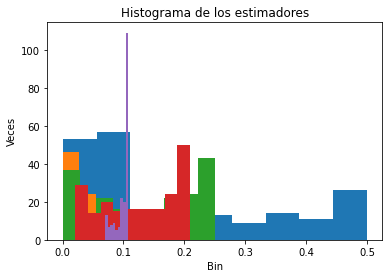

In [6]:
#######################
#Ploteo histogramas
#######################
a1_g_rectangular=np.abs(x_rectangular_mag[250])
plt.hist(a1_g_rectangular,bins='auto')

a1_g_Bartlett=np.abs(x_Bartlett_mag[250])
plt.hist(a1_g_Bartlett,bins='auto')

a1_g_Hann=np.abs(x_Hann_mag[250])
plt.hist(a1_g_Hann,bins='auto')

a1_g_Blackman=np.abs(x_Blackman_mag[250])
plt.hist(a1_g_Blackman,bins='auto')

a1_g_Flattop=np.abs(x_Flattop_mag[250])
plt.hist(a1_g_Flattop,bins='auto')
plt.title('Histograma de los estimadores')
plt.ylabel('Veces')
plt.xlabel('Bin')

In [7]:
#######################
#Calculo de sesgo y varianza
#######################

# media muestral: mu_a = 1/M.SUM{â_j} de 0 a M-1

E_rectangular=np.mean(a1_g_rectangular)
E_Bartlett=np.mean(a1_g_Bartlett)
E_Hann=np.mean(a1_g_Hann)
E_Blackman=np.mean(a1_g_Blackman)
E_Flattop=np.mean(a1_g_Flattop)

#Sesgo: s = mu - a0

s_rectangular = E_rectangular - a0
s_Bartlett = E_Bartlett - a0
s_Hann = E_Hann - a0
s_Blackman = E_Blackman - a0
s_Flattop = E_Flattop - a0

#Varianza: Var(x)=E[(X-mu)**2]

var_rectangular = np.var(a1_g_rectangular)
var_Bartlett = np.var(a1_g_Bartlett)
var_Hann = np.var(a1_g_Hann)
var_Blackman = np.var(a1_g_Blackman)
var_Flattop = np.var(a1_g_Flattop)

# Muestro los datos

data = [[s_rectangular, var_rectangular],
        [s_Bartlett, var_Bartlett],
        [s_Hann, var_Hann],
        [s_Blackman, var_Blackman],
        [s_Flattop, var_Flattop]]

df = DataFrame(data,columns=['$s_a$', '$v_a$'],
                index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                      ])
HTML(df.to_html())

plt.show()